In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow  as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

from tensorflow.keras.callbacks import *

from sklearn.metrics import mean_absolute_error
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

import os

2021-09-01 23:34:07.023323: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-01 23:34:07.023390: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
#frame = pd.read_csv(r'ausleihe2.csv')
frame = pd.read_csv(r'ausleihen_mit_wetter.csv')
df = pd.DataFrame(frame)
col = list(df.columns.values)

test = pd.DataFrame(frame)

df.head()

,year,week,station1,count,tempC,sunHour,precipMM,FeelsLikeC,humidity
0,2015,1,1 Ave & E 18 St,119,6.0,6.525,6.45,-1.25,71.0
1,2015,1,1 Ave & E 30 St,147,6.0,6.525,6.45,-1.25,71.0
2,2015,1,1 Ave & E 44 St,73,6.0,6.525,6.45,-1.25,71.0
3,2015,1,11 Ave & W 27 St,73,6.0,6.525,6.45,-1.25,71.0
4,2015,1,11 Ave & W 41 St,133,6.0,6.525,6.45,-1.25,71.0


In [4]:
#get input and output
x = df.drop("count",axis=1)
y = df["count"]

In [5]:
#split data into train and test
x_train, x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=False)

In [21]:
#normalise data
ct = make_column_transformer(
 (MinMaxScaler(),["year","week","tempC","sunHour","precipMM","FeelsLikeC","humidity"]),
     (OneHotEncoder(handle_unknown="ignore"),["station1"]))

 

ct.fit(x_train)

x_train_normalized = ct.transform(x_train)

x_test_normalized = ct.transform(x_test)

x_train_normalized.shape

print(x_test_normalized.shape)


(25108, 699)


In [23]:
#create Model structure
with tf.device('/device:CPU:0'):
    model = Sequential()
    model.add(Dense(699, kernel_initializer='normal',  activation='relu', input_shape=(699,) ))    
    model.add(Dense(350, kernel_initializer='normal',activation='relu'))   
    model.add(Dense(350, kernel_initializer='normal',activation='relu'))   
    model.add(Dense(1, kernel_initializer='normal',activation=None))

In [24]:
#set model loss and optimizer
with tf.device('/device:CPU:0'):
    model.compile(optimizer= Adam(learning_rate=0.0001),loss='mae', metrics=['mae','mape'])

In [25]:
#checkpoint to save best Model which isnt overfitted
checkpoint = ModelCheckpoint('Model1', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min' )

In [26]:
#train Model
with tf.device('/device:CPU:0'):
    history = model.fit(x_train_normalized, y_train.values, epochs=30 , batch_size=30,shuffle=False   )

Epoch 1/30


/home/max/.local/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/dense_4/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/dense_4/embedding_lookup_sparse/Reshape:0", shape=(None, 699), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/dense_4/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


  10/3348 [..............................] - ETA: 21s - loss: 107.7808 - mae: 107.7808 - mape: 99.8925 

2021-09-01 23:47:28.617135: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


3348/3348 [==============================] - 18s 5ms/step - loss: 184.2105 - mae: 184.2105 - mape: 113.2519
Epoch 2/30
3348/3348 [==============================] - 18s 5ms/step - loss: 84.2046 - mae: 84.2046 - mape: 39.7481
Epoch 3/30
3348/3348 [==============================] - 18s 5ms/step - loss: 78.7357 - mae: 78.7357 - mape: 36.1168
Epoch 4/30
3348/3348 [==============================] - 18s 5ms/step - loss: 74.9429 - mae: 74.9429 - mape: 33.3153
Epoch 5/30
3348/3348 [==============================] - 18s 5ms/step - loss: 71.9688 - mae: 71.9688 - mape: 31.3168
Epoch 6/30
3348/3348 [==============================] - 18s 5ms/step - loss: 69.5370 - mae: 69.5370 - mape: 29.8312
Epoch 7/30
3348/3348 [==============================] - 18s 5ms/step - loss: 67.5633 - mae: 67.5633 - mape: 28.6514
Epoch 8/30
3348/3348 [==============================] - 18s 5ms/step - loss: 66.0726 - mae: 66.0726 - mape: 27.8041
Epoch 9/30
3348/3348 [==============================] - 19s 6ms/step - loss: 64.

In [27]:
model.evaluate(x_test_normalized,y_test.values)

785/785 [==============================] - 1s 2ms/step - loss: 125.8699 - mae: 125.8699 - mape: 51.8026


[125.86991119384766, 125.86991119384766, 51.80257797241211]

In [77]:
print(x_test_normalized.toarray())

[[0.         0.54901961 0.88962892 ... 0.         0.         0.        ]
 [0.         0.54901961 0.88962892 ... 0.         0.         0.        ]
 [0.         0.54901961 0.88962892 ... 0.         0.         0.        ]
 ...
 [0.         0.1372549  0.01807802 ... 0.         0.         0.        ]
 [0.         0.1372549  0.01807802 ... 0.         0.         0.        ]
 [0.         0.1372549  0.01807802 ... 0.         1.         0.        ]]


In [28]:
stationnamesframe =   test.drop_duplicates() 
stationnamesframe = pd.DataFrame(stationnamesframe,columns=['station1'])
stationnamesframe =   stationnamesframe.drop_duplicates() 
stationnames =  pd.DataFrame(stationnamesframe , columns=['station1'])['station1'].to_numpy().tolist()
print(len(stationnames))

692


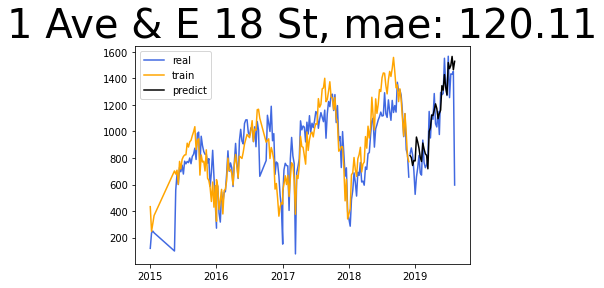

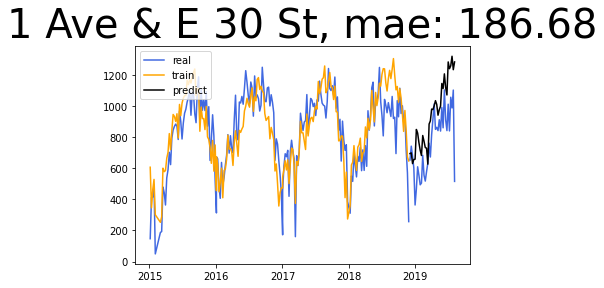

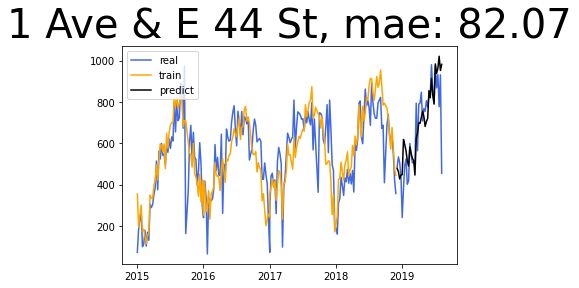

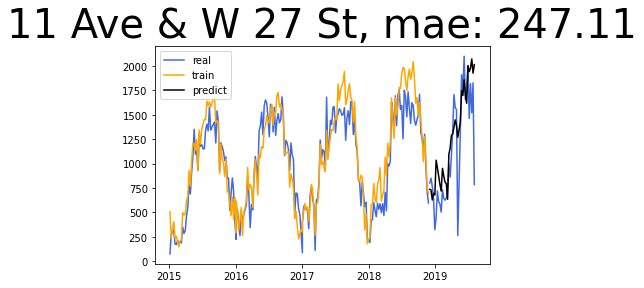

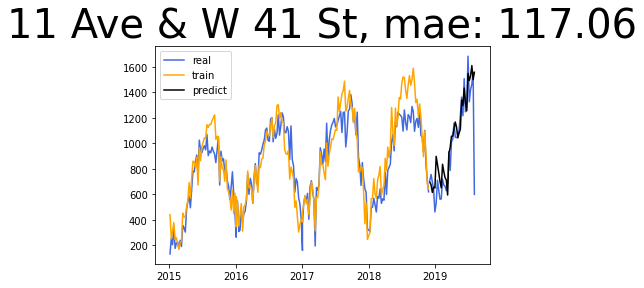

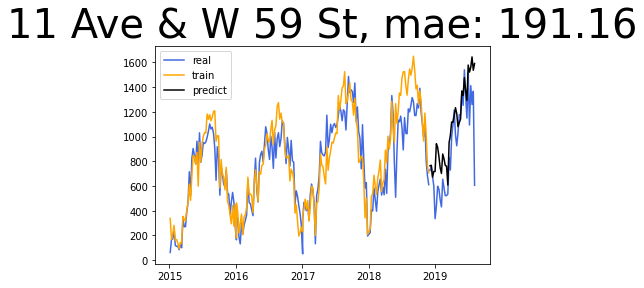

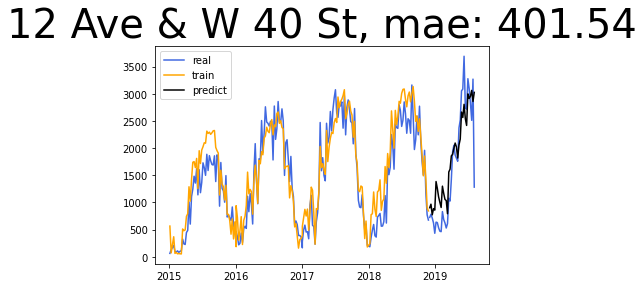

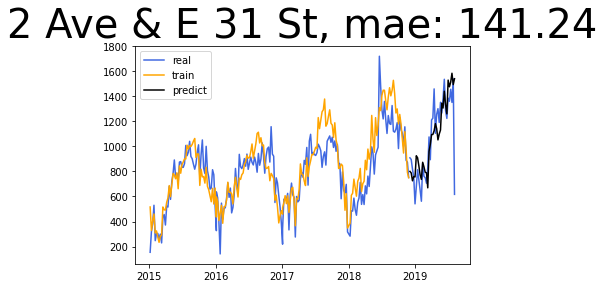

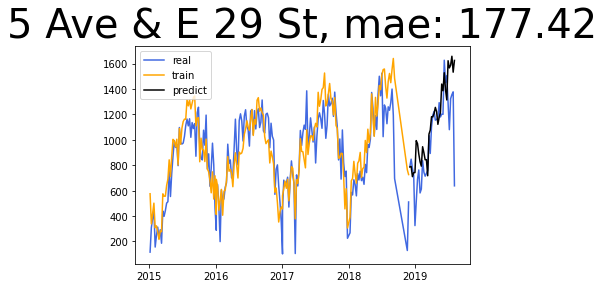

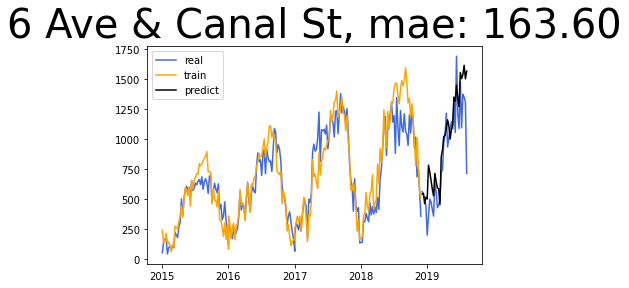

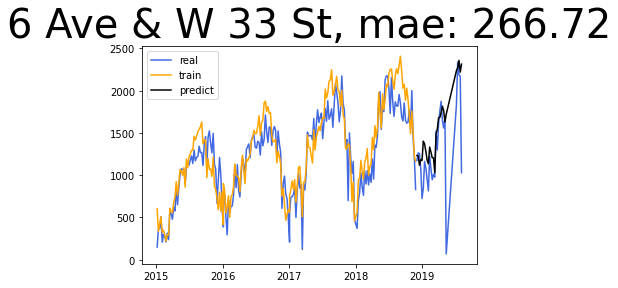

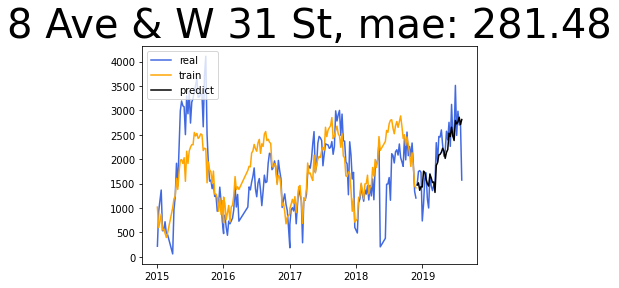

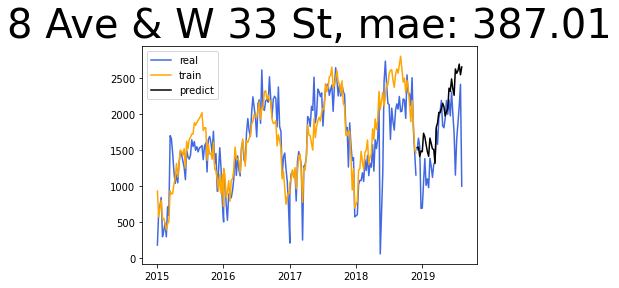

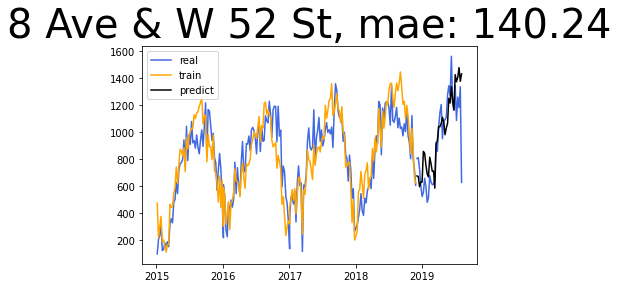

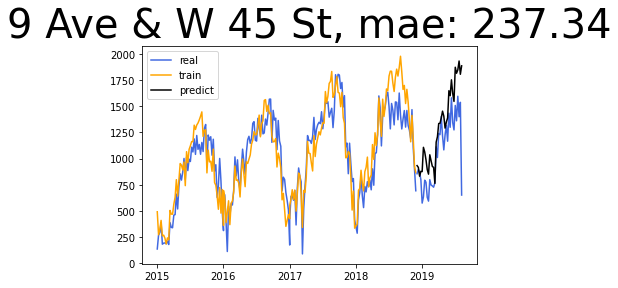

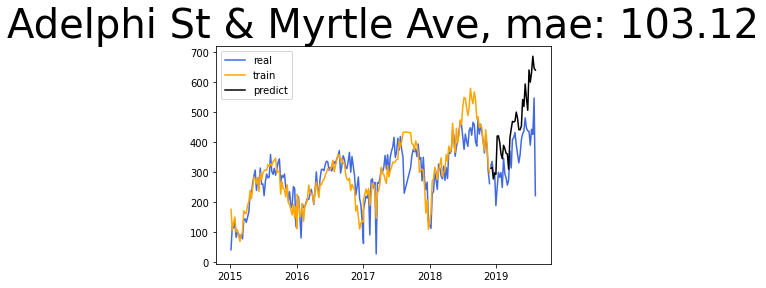

KeyboardInterrupt: 

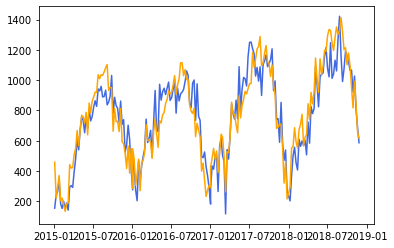

In [29]:
#show result data linear

for station in stationnames:
    predict_train = model.predict(x_train_normalized)
    y1 =  y_train 
    y2 =  predict_train 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#

    test1 = test.iloc[:y_train.shape[0]]
    test1 = pd.DataFrame(test1)
    test1['y'] = y1
    test1['y2'] = y2
    test1 = test1[test1['station1']==station]
    test1['yearweek'] = pd.to_datetime(test1['year'].astype(str) + ' ' + test1['week'].astype(str) + ' 1',format='%Y %U %w')
    #print(test1)

    plt.plot(test1['yearweek'],test1['y'],label='real' , color = 'royalblue'  )
    plt.plot(test1['yearweek'],test1['y2'],label='train' , color = 'orange'  )
    predict_test = model.predict(x_test_normalized)
    y1 =  y_test 
    y2 =  predict_test 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
    test2 = test.iloc[-y_test.shape[0]:]
    test2 = pd.DataFrame(test2)
    #print(test2)
    test2['y'] = y1
    test2['y2'] = y2
    test2 = test2[test2['station1']==station]
    test2['yearweek'] = pd.to_datetime(test2['year'].astype(str) + ' ' + test2['week'].astype(str) + ' 1',format='%Y %U %w')
    #print(test2)
    #print(test2['y'])
    
    try:
        mae = mean_absolute_error(test2['y'] ,test2['y2'] )
        plt.title(label=station+", mae: {:0.2f}".format(mae) ,
          fontsize=40,
          color="black")
        #plt.show()
    except:
        plt.title(label=station+", mae: nan"  ,
          fontsize=40,
          color="black")
    plt.plot(test2['yearweek'],test2['y'],label='_Hidden' , color = 'royalblue'  )
    plt.plot(test2['yearweek'],test2['y2'],label='predict' , color = 'black' )
    
    plt.legend(loc="upper left")
    #plt.savefig( 'Model3Images/'+station+'linear.jpg',bbox_inches='tight', dpi=150)
    plt.show()

In [ ]:
for station in stationnames:
    #predict_train = model.predict(x_train_normalized)
    y1 =  df['count']
    #y2 =  predict_train 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#

    #test1 = test.iloc[:y_train.shape[0]]
    test1 = pd.DataFrame(df)
    #test1['y'] = y1
    #test1['y2'] = y2
    test1 = test1[test1['station1']==station]
    test1['yearweek'] = pd.to_datetime(test1['year'].astype(str) + ' ' + test1['week'].astype(str) + ' 1',format='%Y %U %w')
    #print(test1)

    plt.plot(test1['yearweek'],test1['count'],label='real' , color = 'royalblue'  )       
    plt.title(label=station,
          fontsize=40,
          color="black")

    #plt.legend(loc="upper left")
    #plt.savefig('Model1Images/'+station+'_first.jpg',bbox_inches='tight', dpi=150)
    plt.show()

In [ ]:
df['count'].mean()